In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

## ANOVA - Independent Measures Design
- Created by: **Bahy Helmi Hartoyo Putra**
- Source: **Essentials of Statistics for the Behavioral Sciences Eighth Edition by Frederick J. Gravetter and Larry B. Wallnau**

### Objective(s)
- Evaluate mean differences of **GO-JEK Drivers Driving Performance** between two or more different treatments.
- Define which mean differences are significant, and which are not.

### Term(s)
- **SS**: Sum of Squares
- **df**: Degree of Freedom

### Load Dataset

In [31]:
dataset = pd.DataFrame({"no-phone": [4,3,6,3,4], "hand-held": [0,1,3,1,0], "hands-free": [1,2,2,0,0]})

#### Dataset of GO-JEK Driver Driving Performance

In [32]:
dataset

,no-phone,hand-held,hands-free
0,4,0,1
1,3,1,2
2,6,3,2
3,3,1,0
4,4,0,0


## Manual Way

### Calculate Variability

#### Total Variance

Calculate SS total of all treatments

In [38]:
## Using computational formula (SStotal = ΣX² - G²/N)
total_ss_comp = 0
total_x_square = 0
grand_total_square = np.square(dataset.values.sum())
total_n = dataset.shape[0] * dataset.shape[1]

for num in dataset.values.flatten():
    total_x_square += np.square(num)
total_ss_comp = total_x_square - (grand_total_square/total_n)

print("Computational SS-total: " + str(total_ss_comp))

Computational SS-total: 46.0


In [39]:
## Using definitional formula (Subtract each number from the mean, square it, sum up the results)
total_ss_def = 0
mean = dataset.values.sum()/total_n

for num in dataset.values.flatten():
    total_ss_def += np.square(num - mean)
    
print("Definitional SS-total: " + str(total_ss_def))

Definitional SS-total: 46.0


Calculate df total of all treatments

In [41]:
## Total number of values (N) - 1
df_total = total_n - 1
print("df-total: " + str(df_total))

df-total: 14


#### Within-Treatments Variance

Calculate SS-within each treatment

In [42]:
def calculate_ss_within(array):
    mean = array.sum()/len(array)
    res = 0
    for num in array:
        res += np.square(num - mean)
    return res
    
## Treatment 1 (No-Phone)
no_phone_ss_within = calculate_ss_within(dataset['no-phone'])

## Treatment 2 (Hand-Held)
hand_held_ss_within = calculate_ss_within(dataset['hand-held'])

## Treatment 3 (Hands-Free)
hands_free_ss_within = calculate_ss_within(dataset['hands-free'])

ss_within = no_phone_ss_within + hand_held_ss_within + hands_free_ss_within
print("SS-within: " + str(ss_within))

SS-within: 16.0


Calculate df-within

In [44]:
## Subtract number of treatments (k) from total number of values (N)
k = len(dataset.columns)
df_within = total_n - k

#### Between-Treatments Variance

Calculate SS-between each treatment

In [48]:
## SS-between = SS-total - SS-within
ss_between = total_ss_comp - ss_within
print("SS-between: " + str(ss_between))

SS-between: 30.0


Calculate df treatment

In [50]:
## Subtract the number of treatments (k) with 1
df_between = k-1
print("df-between: " + str(df_between))

df-between: 2


### ANOVA Summary Table

#### Do calculation using F-ratio formula

In [53]:
## Variance between treatments
ms_between = ss_between/df_between
print("MS-between (variance between): " + str(ms_between))

## Variance within treatments
ms_within = ss_within/df_within
print("MS-within (variance within): " + str(ms_within))

## F-value
f_value = ms_between/ms_within
print("F-value: " + str(f_value))

MS-between (variance between): 15.0
MS-within (variance within): 1.3333333333333333
F-value: 11.25


In [60]:
summary_table = pd.DataFrame({"SS": [ss_between, ss_within, total_ss], "df": [df_between, df_within, df_total],\
                             "MS": [ms_between, ms_within, "-"], "F": [f_value, "-", "-"]}, \
                             index=['Between treatments', 'Within treatments', 'Total'])

In [61]:
summary_table

,SS,df,MS,F
Between treatments,30.0,2,15,11.25
Within treatments,16.0,12,1.33333,-
Total,46.0,14,-,-


## Using SciPy

In [83]:
f, p_value = f_oneway(dataset['no-phone'], dataset['hand-held'], dataset['hands-free'])
print("F-value: " + str(f))
print("p-value: " + str(p_value))

F-value: 11.25
p-value: 0.0017708138328537343


## Significance (Plot)

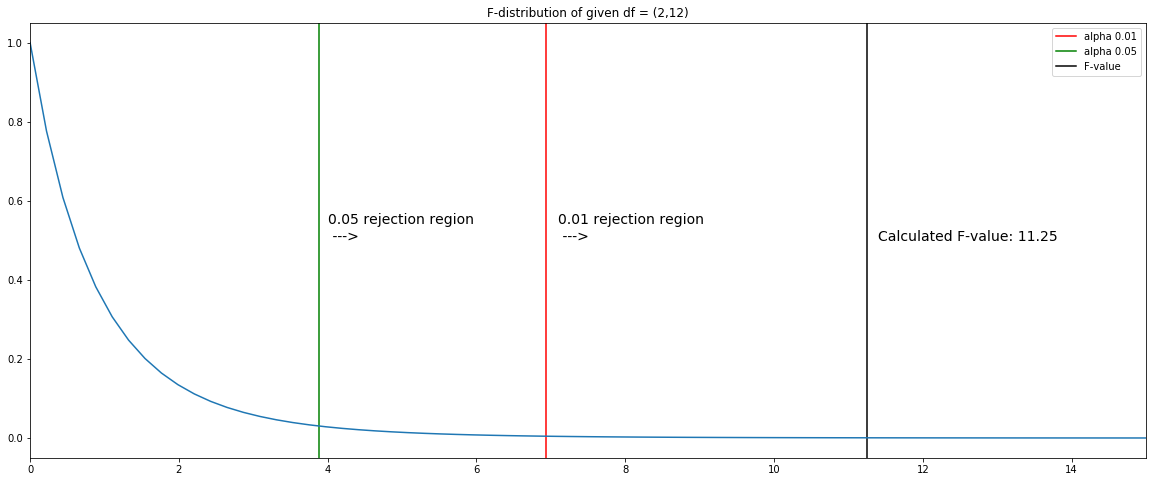

In [125]:
from scipy.stats import f

# Freeze for dfn=4, dfd=12, loc=0, scale=1 and get the first four moments from stats()
rv = f(dfn=4, dfd=12, loc=0, scale=1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt


import numpy as np
from scipy.stats import f, norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,8))

plt.xlim(0,15)
rv2 = f(dfn=2, dfd=12, loc=0, scale=1)
x = np.linspace(rv2.ppf(0.0001), rv2.ppf(0.9999), 100)
y = rv2.pdf(x) 

plt.axvline(6.93, color='red', label='alpha 0.01')
plt.axvline(3.88, color='green', label='alpha 0.05')
plt.axvline(11.25, color='black', label='F-value')

plt.text(7.1, 0.5, "0.01 rejection region \n --->", fontsize=14)
plt.text(4.0, 0.5, "0.05 rejection region \n --->", fontsize=14)
plt.text(11.4, 0.5, "Calculated F-value: 11.25", fontsize=14)

plt.plot(x,y)
plt.title("F-distribution of given df = (2,12)")
plt.legend()
plt.show()

- The F value we obtained, F = 11.25, is in the critical region. 
- It is very unlikely (p < .05) that we would obtain a value this large if H0 is true. 
- Therefore, we reject H0 and conclude that there is a significant treatment effect.

## Effect Size (eta-squared)

In [128]:
effect_size = ss_between/total_ss_comp
print("Effect size: " + str(effect_size))

Effect size: 0.6521739130434783


## Post Hoc (Tukey's HSD Test)

In [130]:
## q comes from Studentized Range Statistic (q) table
q = 3.53

In [138]:
hsd = q * np.sqrt(ms_within / (total_n / k))
print("HSD: " + str(hsd))

HSD: 1.8228841616149571


The mean difference between any two samples must be at least **1.823** to be significant

In [142]:
mean_no_phone = dataset['no-phone'].mean()
mean_hand_held = dataset['hand-held'].mean()
mean_hands_free = dataset['hands-free'].mean()

In [143]:
mean_no_phone - mean_hand_held

3.0

In [144]:
mean_no_phone - mean_hands_free

3.0

In [145]:
mean_hand_held - mean_hands_free

0.0

- Treatment no_phone **is** significantly different from treatment hand_held
- Treatment no_phone **is** significantly different from treatment hands_free
- Treatment hand_held **is not** significantly different from treatment hands_free